In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [32]:
# get data
train = pd.read_csv(r'..\\data\\train_enrich.csv')
test = pd.read_csv(r'..\\data\\final_test_df.csv')

print(train.shape)
print(test.shape)

(246008, 223)
(48744, 223)


In [33]:
y_train = train.TARGET
X_train = train.drop('TARGET', axis=1)
features = list(X_train.columns)

y_test = test.y_pred
X_test = test.drop('y_pred', axis=1)

In [34]:
import joblib

# Let's load the mode who savec with joblib during the training phase
model = joblib.load('../data/best_model.save') 

# Shap

### 1. Build a TreeExplainer and compute Shaplay Values

In [22]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

print(shap_values)

[array([[ 0.06512128, -0.0522462 , -0.0320351 , ...,  0.01385166,
        -0.18893411,  0.05039224],
       [ 0.0882649 , -0.03132007, -0.04722979, ...,  0.00343576,
         0.09354112,  0.02098084],
       [ 0.0946652 , -0.03097617,  0.0434809 , ..., -0.02813577,
         0.34506864,  0.05421346],
       ...,
       [ 0.11657233, -0.0281129 ,  0.0494248 , ...,  0.0045825 ,
         0.38826716,  0.02570697],
       [ 0.06166616, -0.03528884, -0.03320579, ...,  0.01389523,
         0.07135718,  0.03183088],
       [ 0.09481883, -0.02881587,  0.07466724, ...,  0.00513634,
         0.11467557,  0.05085974]]), array([[-0.06512128,  0.0522462 ,  0.0320351 , ..., -0.01385166,
         0.18893411, -0.05039224],
       [-0.0882649 ,  0.03132007,  0.04722979, ..., -0.00343576,
        -0.09354112, -0.02098084],
       [-0.0946652 ,  0.03097617, -0.0434809 , ...,  0.02813577,
        -0.34506864, -0.05421346],
       ...,
       [-0.11657233,  0.0281129 , -0.0494248 , ..., -0.0045825 ,
        

### 2. Visualize explanations for a specific point of your data set

In [35]:
import pandas as pd

X_test_ = pd.DataFrame(X_test, columns=features)

In [36]:
row_to_show = 10
data_for_prediction = X_test_.iloc[9:10]  # use 1 row of data here. Could use multiple rows if desired
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

model.predict_proba(data_for_prediction_array)

# data_for_prediction.shape

array([[0.89096399, 0.10903601]])

In [ ]:
# data_for_prediction_ = pd.DataFrame(data_for_prediction, columns=features)

# print(data_for_prediction_.shape)
# data_for_prediction_.values.reshape(1, data_for_prediction_.shape[1])

In [37]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer_ = shap.TreeExplainer(model)

# Calculate Shap values
shap_values_ = explainer_.shap_values(data_for_prediction)

In [38]:
shap.initjs()
shap.force_plot(explainer_.expected_value[0], shap_values_[0], data_for_prediction)

### 3. Visualize explanations for all points of your data set at once

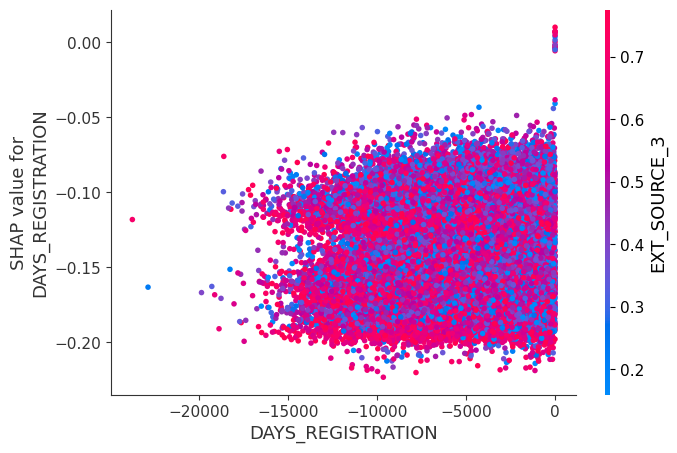

In [45]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)

# make plot.
shap.dependence_plot('DAYS_REGISTRATION', shap_values[1], X_test, interaction_index="EXT_SOURCE_3")

### 4. Visualize a summary plot for each class on the whole dataset

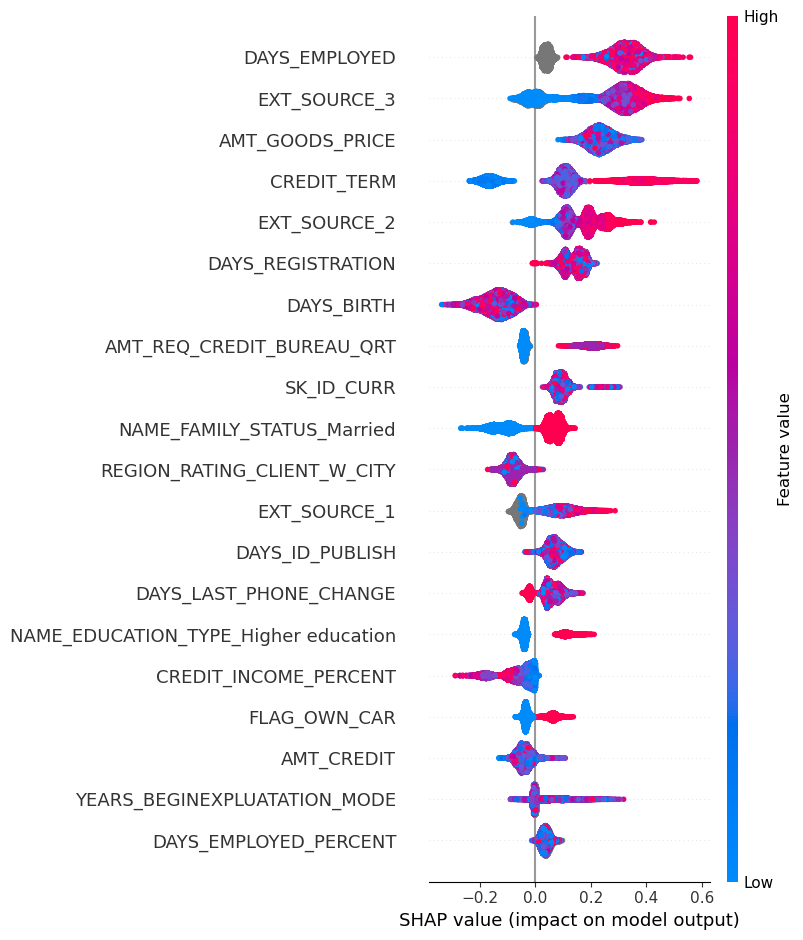

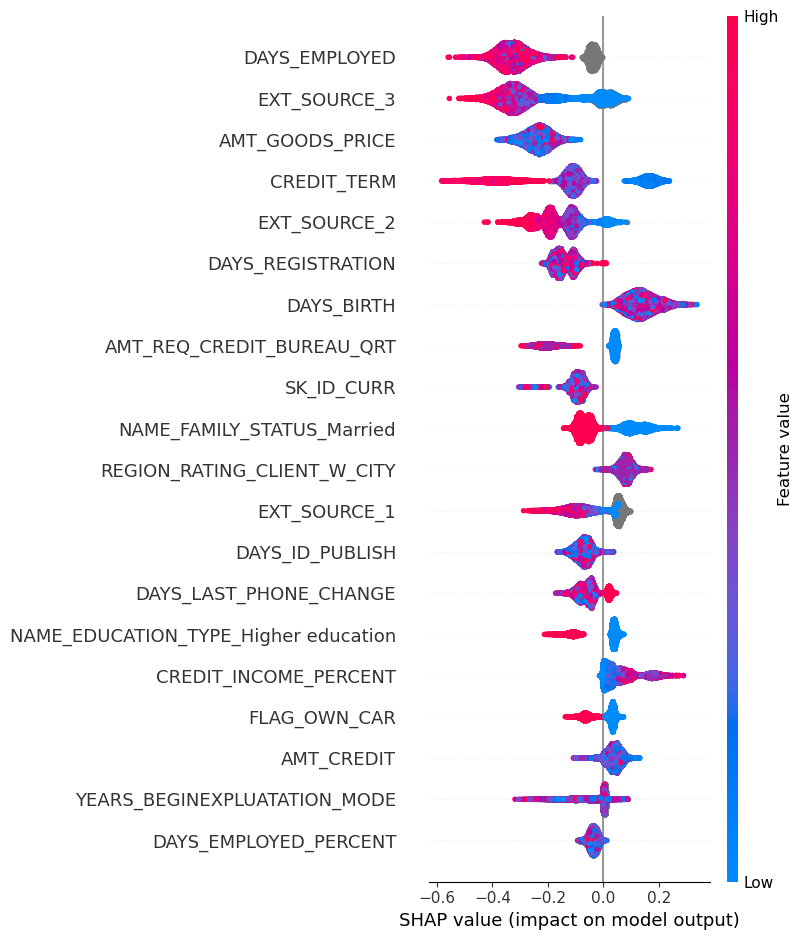

In [42]:
shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(shap_values[1], X_test)